# 2.2 Regularization
### Dependecies:

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, LinearRegression

from lab1 import SSE

In [100]:
#load data
X = np.load('./data3_x.npy')
y = np.load('./data3_y.npy')

alphas=np.arange(10e-3, 10, 10e-3)  #set alphas

### Exercise 3 to 7. Usage of Ridge,Lasso and LS models

In [101]:
#set maximum iterations
ridge_model = Ridge(max_iter=10000)
lasso_model = Lasso(max_iter=10000)

ridge_coefficients = None
lasso_coefficients = None


for alpha in alphas:
    #set model alpha
    ridge_model.alpha = alpha
    lasso_model.alpha = alpha
    #fit the model with the data
    ridge_model.fit(X, y)
    lasso_model.fit(X, y)
    
    #obtain the coefficients of the models
    ridge_coef = ridge_model.coef_
    lasso_coef = np.expand_dims(lasso_model.coef_, 0)

    if type(ridge_coefficients) != np.ndarray:
        ridge_coefficients = ridge_coef
        lasso_coefficients = lasso_coef
    else:
        ridge_coefficients = np.concatenate((ridge_coefficients, ridge_coef), axis=0)
        lasso_coefficients = np.concatenate((lasso_coefficients, lasso_coef), axis=0)


In [102]:
LS_model = LinearRegression()   #instanciate Linear regression model
LS_model.fit(X, y)   #fit data on the model

#create lines of the coefficients of the LS model to be ploted against the coefficients of Lasso and Ridge model
c1 = np.ones(len(alphas)) * LS_model.coef_[0][0]
c2 = np.ones(len(alphas)) * LS_model.coef_[0][1]
c3 = np.ones(len(alphas)) * LS_model.coef_[0][2]

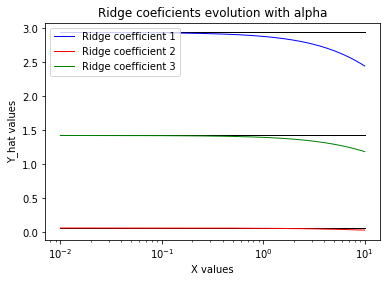

In [103]:
#plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(alphas, c1, color='black', lw=1)
ax.plot(alphas, c2, color='black', lw=1)
ax.plot(alphas, c3, color='black', lw=1)

ax.plot(alphas, ridge_coefficients[:,0], color='blue', lw=1,label='Ridge coefficient 1')
ax.plot(alphas, ridge_coefficients[:,1], color='red', lw=1,label='Ridge coefficient 2')
ax.plot(alphas, ridge_coefficients[:,2], color='green', lw=1,label='Ridge coefficient 3')

plt.xlabel('X values')
plt.ylabel('Y_hat values')
plt.title('Ridge coeficients evolution with alpha')
plt.legend()
ax.set_xscale('log')
plt.show()

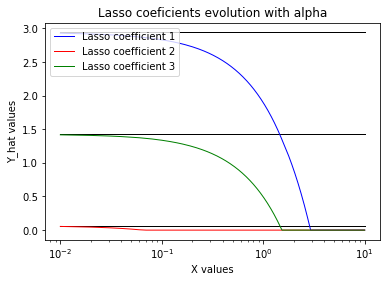

In [104]:
#plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(alphas, c1, color='black', lw=1)
ax.plot(alphas, c2, color='black', lw=1)
ax.plot(alphas, c3, color='black', lw=1)

ax.plot(alphas, lasso_coefficients[:,0], color='blue', lw=1,label='Lasso coefficient 1')
ax.plot(alphas, lasso_coefficients[:,1], color='red', lw=1,label='Lasso coefficient 2')
ax.plot(alphas, lasso_coefficients[:,2], color='green', lw=1,label='Lasso coefficient 3')

plt.xlabel('X values')
plt.ylabel('Y_hat values')
plt.title('Lasso coeficients evolution with alpha')
plt.legend()
ax.set_xscale('log')
plt.show()

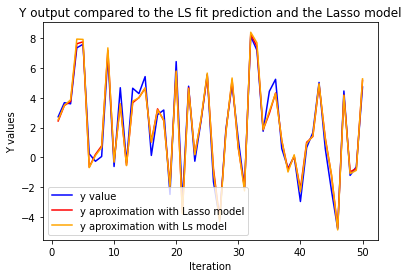

Lasso sse: 15.680321926793942
Least Squares sse: 14.982010067652942


In [105]:
l = np.linspace(0, X.shape[0]-1, X.shape[0])
l = [X[:,0]]
iterations=np.arange(1,51)    #vector from 1 to 50

for i in range(np.size(lasso_coefficients[:,1])):     #check the first coefficient going to zero
    if lasso_coefficients[i,1]==0:
        best_alpha=alphas[i]      #save the first alpha that made the coefficient reach 0
        break

#adjust the lasso model for the new parameters
lasso_model.alpha = best_alpha
lasso_model.fit(X, y)
lasso_values = lasso_model.predict(X)

#adjust the ls model
LS_model.fit(X, y)
LS_values = LS_model.predict(X)[:,0]

#plot 
plt.plot(iterations, y, color="blue",label='y value')
plt.plot(iterations, lasso_values, color="red",label='y aproximation with Lasso model')
plt.plot(iterations, LS_values, color="orange",label='y aproximation with Ls model')
plt.xlabel('Iteration')
plt.ylabel('Y values')
plt.title('Y output compared to the LS fit prediction and the Lasso model')
plt.legend()
plt.show()
#print SSE values for both cases
print("Lasso sse:", SSE(y, lasso_values))
print("Least Squares sse:", SSE(y, LS_values))
